# **Over Sampling**

Over sampling adalah teknik dalam machine learning atau data mining yang digunakan untuk menyeimbangkan dataset yang tidak seimbang (imbalanced dataset). Dataset tidak seimbang terjadi ketika jumlah data di satu kelas jauh lebih sedikit dibanding kelas lainnya.

Over sampling menambah jumlah data pada kelas minoritas sehingga jumlahnya menjadi lebih seimbang dengan kelas mayoritas.

## **Tujuan**

1. Menganalisis distribusi kelas dalam dataset ecoli
2. Memvisualkan data dalam scatter plot  menggunakan PCA.PCA mentransformasi data menjadi dimensi rendah (2).
3. Mengaplikasikan teknik ADASYN dan SMOTEuntuk menyeimbangkan data
4. Memvisualisasikan hasil sebelum dan sesudah ADASYN
5. Memvisualisasikan hasil sebelum dan sesudah SMOTE
5. Membandingkan distribusi data menggunakan PCA dan LDA
6. Menghitung akurasi keduanya dengan Naive Bayer,Random Forest,dan Bagging classifier

## **Pengenalan Dataset**

- Menampilkan semua isi dari dataset ecoli untuk memahami struktur data.

In [1]:
df = pd.read_csv('ecoli.data')
print("Isi tabel ecoli:\n")
print(df.head())

NameError: name 'pd' is not defined

## **Analisis Distribusi Kelas**

Lakukan analisis awal untuk mengidentifikasi ketidakseimbangan kelas :

1. Hitung banyaknya sampel untuk masing-masing spesies menggunakan value_counts().

2. Tentukan kelas yang termasuk minoritas dan mayoritas.

3. Hasil analisis ini akan membantu mengetahui apakah dataset perlu dilakukan penyeimbangan.

In [ ]:
import pandas as pd
import io

column_names = ['sequence_name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']
df = pd.read_csv('ecoli.data', delim_whitespace=True, header=None, names=column_names)

# Menghitung jumlah pada tiap kelas di kolom 'class'
class_counts = df['class'].value_counts()

print("Jumlah pada tiap kelas di kolom 'class':")
print(class_counts)

Jumlah pada tiap kelas di kolom 'class':
class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imL      2
imS      2
Name: count, dtype: int64


/tmp/ipython-input-3550560290.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('ecoli.data', delim_whitespace=True, header=None, names=column_names)


## **Analisis Hasil Distribusi Kelas**

Berdasarkan hasil **value_counts()** untuk kolom class, terlihat bahwa distribusi sampel di antara kelas-kelas tidak merata.

Kelas **cp** memiliki jumlah sampel terbanyak, yaitu 143, sehingga dapat dikategorikan sebagai kelas **mayoritas**.Sementara itu, kelas-kelas seperti **imL** dan **imS** hanya memiliki 2 sampel masing-masing, menjadikannya kelas **minoritas** yang sangat kecil. Kelas lain seperti **im**, **pp**, **imU**, dan **om** memiliki jumlah sampel menengah, tetapi tetap jauh lebih sedikit dibandingkan **cp**.

Perbedaan jumlah sampel yang signifikan antara kelas mayoritas dan minoritas ini menunjukkan bahwa dataset tidak seimbang, yang berpotensi membuat model kesulitan mempelajari pola pada kelas minoritas.Oleh karena itu,penyeimbangan dataset akan dilakukan untuk meningkatkan performa model.

## **Visualisasi Data dengan PCA dan LDA**

- **PCA (Principal Component Analysis)**

    Tujuan : Mengurangi dimensi data dengan tetap mempertahankan sebanyak mungkin variasi (variansi) dari data asli.

    Cara Kerja :
    - Mencari kombinasi linear dari fitur asli yang disebut principal components.
    - Komponen pertama menangkap varian terbesar, komponen kedua menangkap varian terbesar kedua, dan seterusnya.

    Kegunaan :
    - Visualisasi data multidimensi.
    - Pra-pemrosesan sebelum algoritma lain untuk mengurangi kompleksitas.


- **LDA (Linear Discriminant Analysis)**

    Tujuan : Mengurangi dimensi data dengan memaksimalkan pemisahan antar kelas.

    Cara Kerja :
    - Mencari kombinasi linear dari fitur yang memaksimalkan rasio antara variansi antar kelas dengan variansi dalam kelas.
    - Hasilnya adalah sumbu baru yang memisahkan kelas sebaik mungkin.

    Kegunaan :
    - Visualisasi data dengan label kelas.

**Tujuan Utama disini adalah untuk Memahami sebaran dan karakteristik data sebelum menerapkan ADASYN.**

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2229756600.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("ecoli.data", sep="\s+", header=None)


Explained variance ratio (first two components): [0.5161681 0.2442034]


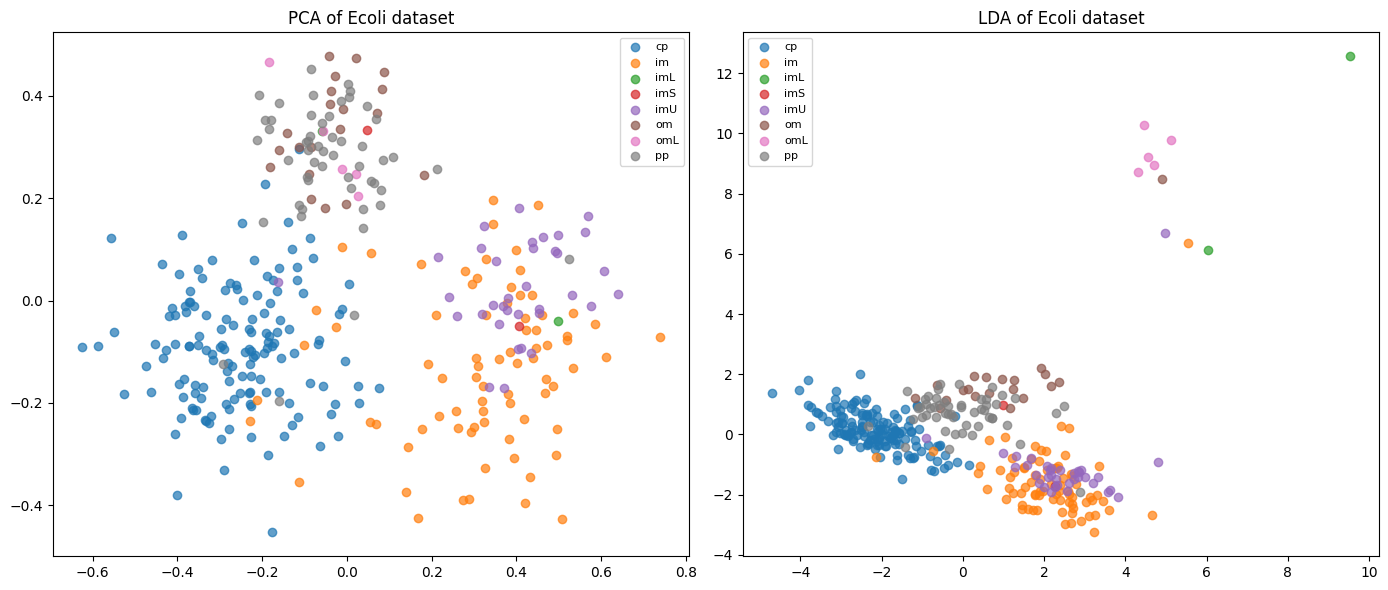

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Baca dataset Ecoli
df = pd.read_csv("ecoli.data", sep="\s+", header=None)

# Ambil fitur (kolom 1–7) dan label (kolom 8)
X = df.iloc[:, 1:8].values
y = df.iloc[:, 8].values

# Encode label string jadi angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_names = le.classes_

# PCA ke 2 dimensi
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# LDA ke 2 dimensi
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y_encoded).transform(X)

# Variance explained PCA
print("Explained variance ratio (first two components):", pca.explained_variance_ratio_)

# Buat subplot agar ada jarak
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = plt.cm.tab10.colors

# Plot PCA
for color, i, target_name in zip(colors, range(len(target_names)), target_names):
    axes[0].scatter(X_r[y_encoded == i, 0], X_r[y_encoded == i, 1],
                    color=color, alpha=0.7, label=target_name)
axes[0].set_title("PCA of Ecoli dataset")
axes[0].legend(loc="best", shadow=False, scatterpoints=1, fontsize=8)

# Plot LDA
for color, i, target_name in zip(colors, range(len(target_names)), target_names):
    axes[1].scatter(X_r2[y_encoded == i, 0], X_r2[y_encoded == i, 1],
                    alpha=0.7, color=color, label=target_name)
axes[1].set_title("LDA of Ecoli dataset")
axes[1].legend(loc="best", shadow=False, scatterpoints=1, fontsize=8)

# Atur layout agar tidak berdempetan
plt.tight_layout()
plt.show()


## **Perisapan data untuk ADASYN**
1. Import library yang diperlukan untuk ADASYN **(from imblearn.over_sampling import ADASYN)**
2. Memisahkan fitur dan targe.
3. Analisis distribusi awal menggunakan **Counter()** untuk melihat ketidakseimbangan.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
from collections import Counter
import pandas as pd

df = pd.read_csv("ecoli.data", sep="\s+", header=None)

# Ambil fitur (kolom 1–7) dan target (kolom 8)
X = df.iloc[:, 1:8]
y = df.iloc[:, 8]

print("Distribusi kelas sebelum ADASYN:")
print(Counter(y))
print(f"Total sampel sebelum ADASYN: {len(y)}")
print(f"Jumlah fitur: {X.shape[1]}")


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2817734371.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("ecoli.data", sep="\s+", header=None)


Distribusi kelas sebelum ADASYN:
Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Total sampel sebelum ADASYN: 336
Jumlah fitur: 7


## **Implementasi ADASYN**

Pada saat saya mencoba menggunakan ADASYN, terjadi error karena pada sebagian kelas minoritas tidak memiliki tetangga dari kelas mayoritas, sehingga menimbulkan masalah division by zero atau tidak memenuhi default n_neighbors=5 dari ADASYN. Hal ini menunjukkan bahwa ADASYN tidak langsung cocok digunakan pada data saya. Namun, saya menemukan solusi yaitu dengan mengubah perulangan dan mengubah nilai default n_neighbors nya.

**Implementasi**

In [18]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import ADASYN
from google.colab import files

# === Load dataset langsung ===
df = pd.read_csv("ecoli.data", sep="\s+", names=[
    "sequence_name", "mcg", "gvh", "lip", "chg",
    "aac", "alm1", "alm2", "class"
])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["sequence_name", "class"])
y = df["class"]

print("Distribusi awal kelas:")
print(sorted(Counter(y).items()))

# Hitung distribusi kelas untuk iterasi ADASYN
class_counts = [count for _, count in sorted(Counter(y).items())]

nt = X
ns = y

temp = sorted(class_counts)
print(f"\nSorted counts untuk iterasi: {temp}")

# Iterasi dengan ADASYN
for i in range(len(temp)):
    n = max(1, temp[i] - 1)  # supaya tidak 0

    print(f"\nIterasi {i+1}: menggunakan k_neighbors={n}")

    try:
        nt, ns = ADASYN(n_neighbors=n, sampling_strategy='minority').fit_resample(nt, ns)
        print(f"Hasil iterasi {i+1}: {sorted(Counter(ns).items())}")
    except Exception as e:
        print(f"Error pada iterasi {i+1}: {e}")
        break

# Ringkasan akhir
print(f"\nDistribusi kelas setelah ADASYN:")
print(sorted(Counter(ns).items()))

print(f"\nTotal samples sebelum: {len(y)}")
print(f"Total samples setelah: {len(ns)}")
print(f"Data yang ditambahkan: {len(ns) - len(y)}")

# === Tambahan untuk simpan & download hasil ===
df_resampled = pd.DataFrame(nt, columns=X.columns)
df_resampled["class"] = ns

output_file = "ecoli_ADASYN_iterative.csv"
df_resampled.to_csv(output_file, index=False)

files.download(output_file)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3322994794.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("ecoli.data", sep="\s+", names=[


Distribusi awal kelas:
[('cp', 143), ('im', 77), ('imL', 2), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]

Sorted counts untuk iterasi: [2, 2, 5, 20, 35, 52, 77, 143]

Iterasi 1: menggunakan k_neighbors=1
Hasil iterasi 1: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]

Iterasi 2: menggunakan k_neighbors=1
Hasil iterasi 2: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]

Iterasi 3: menggunakan k_neighbors=4
Hasil iterasi 3: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 20), ('omL', 143), ('pp', 52)]

Iterasi 4: menggunakan k_neighbors=19
Hasil iterasi 4: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 143), ('omL', 143), ('pp', 52)]

Iterasi 5: menggunakan k_neighbors=34
Hasil iterasi 5: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 146), ('om', 143), ('omL', 143), ('pp', 52)]

Iterasi 6: menggu

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Visualisai Perbandingan Distribusi

Berikut adalah Visualisasi Perbandingan sebelum dan sesudah proses penyeimbangan data,bisa dilihat data sebelum di seimbangkan dan sudah diseimbangkan.

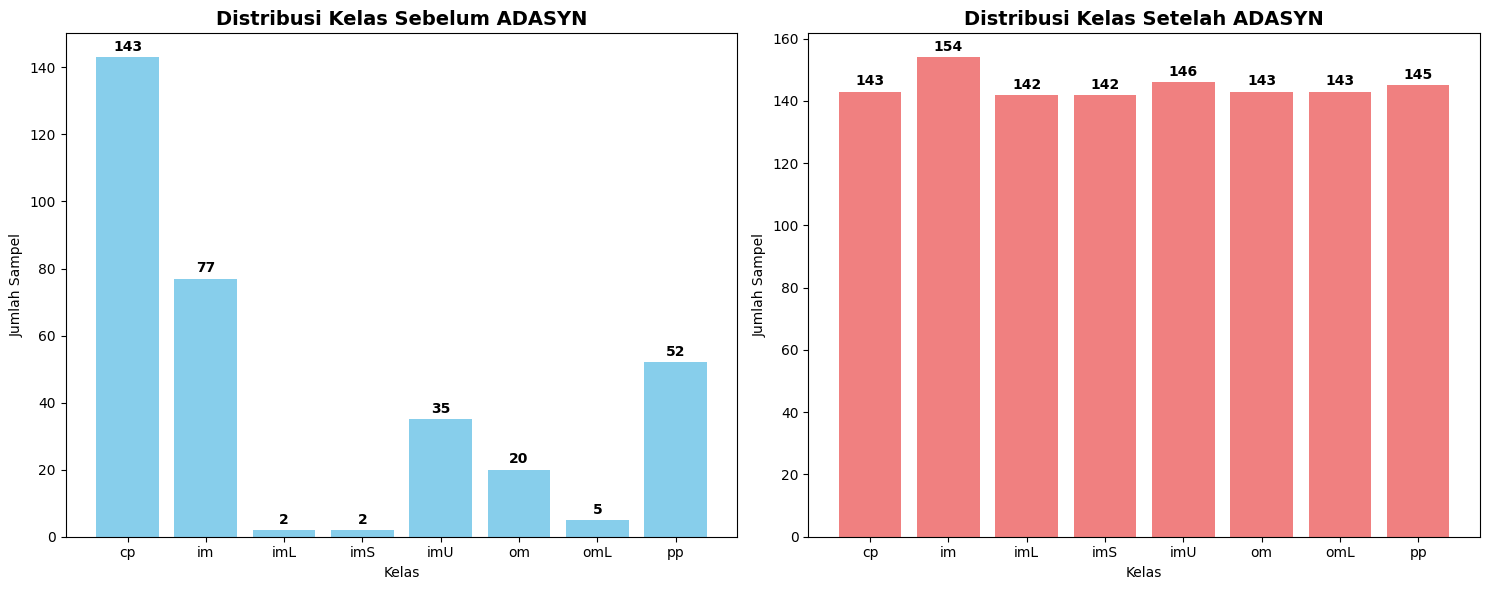


Tabel Perbandingan:
  Kelas  Sebelum ADASYN  Sesudah ADASYN  Sampel Sintetis Ditambahkan
0    cp             143             143                            0
1    im              77             154                           77
2   imL               2             142                          140
3   imS               2             142                          140
4   imU              35             146                          111
5    om              20             143                          123
6   omL               5             143                          138
7    pp              52             145                           93


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Distribusi sebelum dan sesudah ADASYN
before_counts = Counter(y)     # label sebelum resampling
after_counts = Counter(ns)     # label setelah ADASYN iterative

species_names = sorted(before_counts.keys())
before_values = [before_counts[cls] for cls in species_names]
after_values = [after_counts[cls] for cls in species_names]

# Buat subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot distribusi kelas sebelum ADASYN
bars1 = axes[0].bar(species_names, before_values, color='skyblue')
axes[0].set_title('Distribusi Kelas Sebelum ADASYN', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Jumlah Sampel')
axes[0].set_xlabel('Kelas')

# Tambahkan label nilai
for bar, value in zip(bars1, before_values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 str(value), ha='center', va='bottom', fontweight='bold')

# Plot distribusi kelas setelah ADASYN
bars2 = axes[1].bar(species_names, after_values, color='lightcoral')
axes[1].set_title('Distribusi Kelas Setelah ADASYN', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Jumlah Sampel')
axes[1].set_xlabel('Kelas')

# Tambahkan label nilai
for bar, value in zip(bars2, after_values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabel perbandingan
print("\nTabel Perbandingan:")
comparison_df = pd.DataFrame({
    'Kelas': species_names,
    'Sebelum ADASYN': before_values,
    'Sesudah ADASYN': after_values,
    'Sampel Sintetis Ditambahkan': [after_values[i] - before_values[i] for i in range(len(species_names))]
})
print(comparison_df)


## Analisis PCA Data Setelah ADASYN

Visualisasi PCA Comparison:

Panel kiri: Scatter plot data asli dalam ruang PC1–PC2, masih menunjukkan ketidakseimbangan kelas.

Panel kanan: Scatter plot data setelah ADASYN dalam ruang PC1–PC2.

Distribusi awal kelas:
[('cp', 143), ('im', 77), ('imL', 2), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]

Iterasi 1, distribusi: [('cp', 143), ('im', 77), ('imL', 2), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]
  -> Menggunakan n_neighbors=1

Iterasi 2, distribusi: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]
  -> Menggunakan n_neighbors=1

Iterasi 3, distribusi: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]
  -> Menggunakan n_neighbors=4

Iterasi 4, distribusi: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 20), ('omL', 143), ('pp', 52)]
  -> Menggunakan n_neighbors=19

Iterasi 5, distribusi: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 143), ('omL', 143), ('pp', 52)]
  -> Menggunakan n_neighbors=34

Iterasi 6, distribusi: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 1

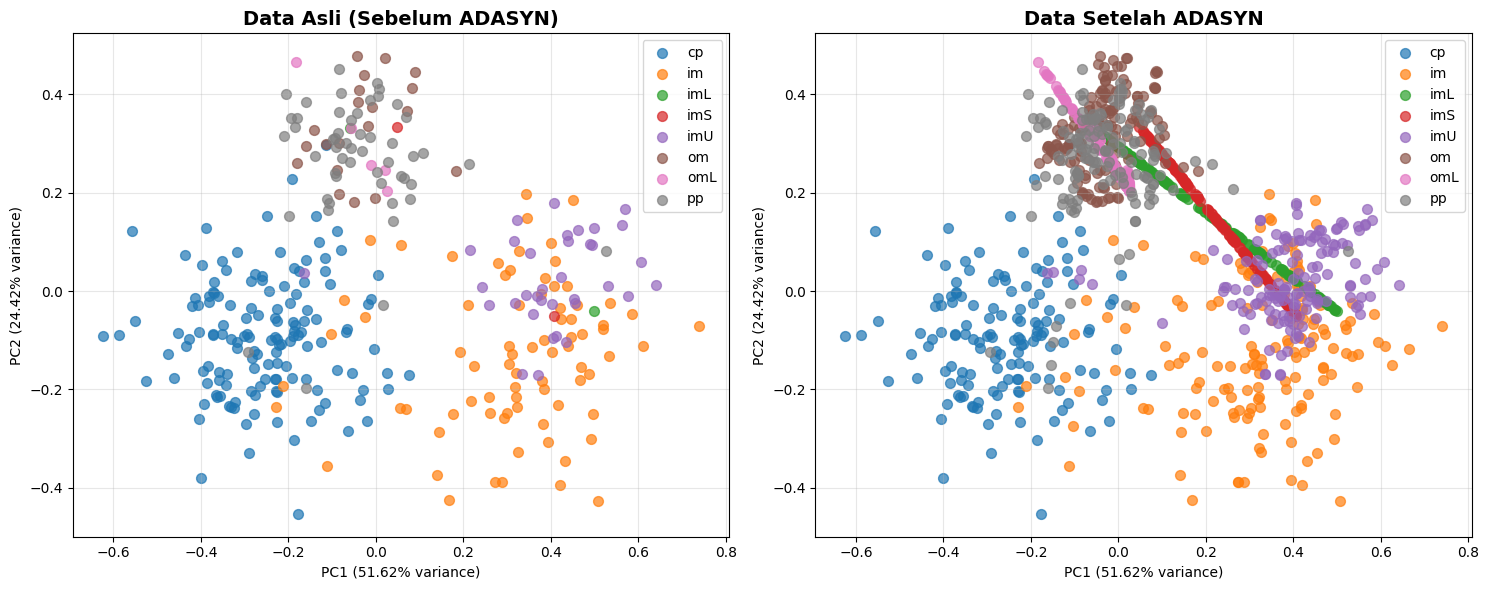


RINGKASAN HASIL ADASYN
• Data asli: 336 sampel
• Data setelah ADASYN: 1156 sampel
• Sampel sintetis ditambahkan: 820 sampel

  Kelas  Sebelum  Sesudah  Ditambahkan
0    cp      143      143            0
1    im       77      154           77
2   imL        2      142          140
3   imS        2      142          140
4   imU       35      146          111
5    om       20      143          123
6   omL        5      143          138
7    pp       52      143           91


In [31]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# ===================================
# Step 0: Load dataset
# ===================================
df = pd.read_csv("ecoli.data", sep=r"\s+", names=[
    "sequence_name", "mcg", "gvh", "lip", "chg",
    "aac", "alm1", "alm2", "class"
])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["sequence_name", "class"])
y = df["class"]

print("Distribusi awal kelas:")
print(sorted(Counter(y).items()))

# ===================================
# Step 1: Iterasi ADASYN (min 3 sampel per kelas)
# ===================================
nt, ns = X, y
class_counts = [count for _, count in sorted(Counter(y).items())]
temp = sorted(class_counts)

for i in range(len(temp)):
    n = max(1, temp[i] - 1)  # jumlah neighbors minimal
    print(f"\nIterasi {i+1}, distribusi: {sorted(Counter(ns).items())}")
    print(f"  -> Menggunakan n_neighbors={n}")
    try:
        nt, ns = ADASYN(n_neighbors=n, sampling_strategy='minority', random_state=42).fit_resample(nt, ns)
    except Exception as e:
        print(f"  -> Error: {e}")
        break

print("\nDistribusi setelah perulangan ADASYN:")
print(sorted(Counter(ns).items()))

# ===================================
# Step 2: Visualisasi PCA
# ===================================
print("\nVISUALISASI PCA DATA SETELAH ADASYN")

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Mapping hasil ADASYN ke index label
label_to_idx = {label: idx for idx, label in enumerate(le.classes_)}
ns_encoded = [label_to_idx[label] for label in ns]

pca = PCA(n_components=2, random_state=42)
X_pca_original = pca.fit_transform(X)
X_pca_res = pca.transform(nt)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
colors = plt.cm.tab10.colors
class_labels = le.classes_

# Plot data asli
for i, (color, label) in enumerate(zip(colors, class_labels)):
    mask = y_encoded == i
    axes[0].scatter(X_pca_original[mask, 0], X_pca_original[mask, 1],
                    c=[color], label=label, alpha=0.7, s=50)
axes[0].set_title('Data Asli (Sebelum ADASYN)', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot data hasil ADASYN
for i, (color, label) in enumerate(zip(colors, class_labels)):
    mask = [idx == i for idx in ns_encoded]
    axes[1].scatter(X_pca_res[mask, 0], X_pca_res[mask, 1],
                    c=[color], label=label, alpha=0.7, s=50)
axes[1].set_title('Data Setelah ADASYN', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================
# Step 3: Ringkasan distribusi
# ===================================
before_counts = Counter(y)
after_counts = Counter(ns)

print("\nRINGKASAN HASIL ADASYN")
print(f"• Data asli: {len(y)} sampel")
print(f"• Data setelah ADASYN: {len(ns)} sampel")
print(f"• Sampel sintetis ditambahkan: {len(ns) - len(y)} sampel\n")

# Tabel distribusi
summary = []
for label in class_labels:
    before = before_counts[label]
    after = after_counts[label]
    added = after - before
    summary.append([label, before, after, added])

summary_df = pd.DataFrame(summary, columns=["Kelas", "Sebelum", "Sesudah", "Ditambahkan"])
print(summary_df)


Distribusi awal kelas:
[('cp', 143), ('im', 77), ('imL', 2), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]

Iterasi 1, distribusi: [('cp', 143), ('im', 77), ('imL', 2), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]
  -> Menggunakan n_neighbors=1

Iterasi 2, distribusi: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]
  -> Menggunakan n_neighbors=1

Iterasi 3, distribusi: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]
  -> Menggunakan n_neighbors=4

Iterasi 4, distribusi: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 20), ('omL', 143), ('pp', 52)]
  -> Menggunakan n_neighbors=19

Iterasi 5, distribusi: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 143), ('omL', 143), ('pp', 52)]
  -> Menggunakan n_neighbors=34

Iterasi 6, distribusi: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 1

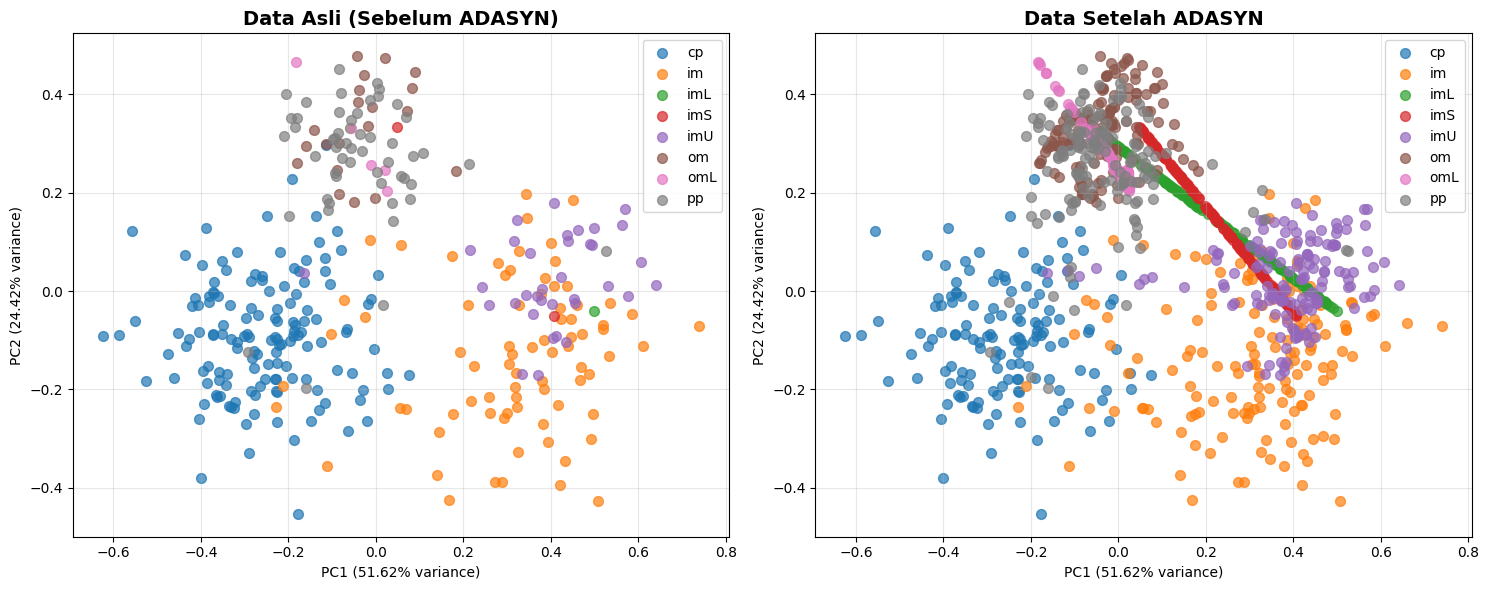


RINGKASAN HASIL ADASYN
• Data asli: 336 sampel
• Data setelah ADASYN: 1159 sampel
• Sampel sintetis ditambahkan: 823 sampel

Distribusi per kelas:
  - cp   | sebelum: 143 | sesudah: 143 | ditambah:   0
  - im   | sebelum:  77 | sesudah: 154 | ditambah:  77
  - imL  | sebelum:   2 | sesudah: 142 | ditambah: 140
  - imS  | sebelum:   2 | sesudah: 142 | ditambah: 140
  - imU  | sebelum:  35 | sesudah: 146 | ditambah: 111
  - om   | sebelum:  20 | sesudah: 143 | ditambah: 123
  - omL  | sebelum:   5 | sesudah: 143 | ditambah: 138
  - pp   | sebelum:  52 | sesudah: 146 | ditambah:  94


In [23]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# === Load dataset ===
df = pd.read_csv("ecoli.data", sep=r"\s+", names=[
    "sequence_name", "mcg", "gvh", "lip", "chg",
    "aac", "alm1", "alm2", "class"
])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["sequence_name", "class"])
y = df["class"]

print("Distribusi awal kelas:")
print(sorted(Counter(y).items()))

# ===================================
# Step 1: Iterasi ADASYN minimal 3 sampel
# ===================================
nt, ns = X, y
class_counts = [count for _, count in sorted(Counter(y).items())]
temp = sorted(class_counts)

for i in range(len(temp)):
    n = max(1, temp[i] - 1)
    print(f"\nIterasi {i+1}, distribusi: {sorted(Counter(ns).items())}")
    print(f"  -> Menggunakan n_neighbors={n}")
    try:
        nt, ns = ADASYN(n_neighbors=n, sampling_strategy='minority').fit_resample(nt, ns)
    except Exception as e:
        print(f"  -> Error: {e}")
        break

print("\nDistribusi setelah perulangan minimal 3:")
print(sorted(Counter(ns).items()))

# ===================================
# Step 2: Visualisasi PCA
# ===================================
print("\nVISUALISASI PCA DATA SETELAH ADASYN")

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# mapping manual hasil ADASYN
label_to_idx = {label: idx for idx, label in enumerate(le.classes_)}
ns_encoded = [label_to_idx[label] for label in ns]

pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_res = pca.transform(nt)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
colors = plt.cm.tab10.colors
class_labels = le.classes_

# Plot data asli
for i, (color, label) in enumerate(zip(colors, class_labels)):
    mask = y_encoded == i
    axes[0].scatter(X_pca_original[mask, 0], X_pca_original[mask, 1],
                    c=[color], label=label, alpha=0.7, s=50)
axes[0].set_title('Data Asli (Sebelum ADASYN)', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot data hasil ADASYN
for i, (color, label) in enumerate(zip(colors, class_labels)):
    mask = [idx == i for idx in ns_encoded]
    axes[1].scatter(X_pca_res[mask, 0], X_pca_res[mask, 1],
                    c=[color], label=label, alpha=0.7, s=50)
axes[1].set_title('Data Setelah ADASYN', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================
# Step 3: Ringkasan distribusi
# ===================================
before_counts = Counter(y)
after_counts = Counter(ns)

print("\nRINGKASAN HASIL ADASYN")
print(f"• Data asli: {len(y)} sampel")
print(f"• Data setelah ADASYN: {len(ns)} sampel")
print(f"• Sampel sintetis ditambahkan: {len(ns) - len(y)} sampel\n")

print("Distribusi per kelas:")
for label in class_labels:
    before = before_counts[label]
    after = after_counts[label]
    added = after - before
    print(f"  - {label:4} | sebelum: {before:3} | sesudah: {after:3} | ditambah: {added:3}")


## **Perisapan Data Untuk SMOTE**

1. Import library yang diperlukan
2. Pisahkan fitur dan target
3. Analisis distribusi awal
4. Penerapan SMOTE

SMOTE adalah sebuah teknik oversampling yang digunakan untuk menangani masalah imbalanced dataset (ketidakseimbangan jumlah data antar kelas).
Alih-alih menyalin data minoritas secara langsung (seperti Random Oversampling), SMOTE menciptakan sampel sintetis baru dengan cara interpolasi antar data yang ada.



## **Impelementasi SMOTE**

In [27]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Misal X dan y sudah ada (fitur & target)
# Terapkan SMOTE
smote = SMOTE(k_neighbors=1, random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

print("Distribusi sebelum SMOTE:", Counter(y))
print("Distribusi sesudah SMOTE:", Counter(y_sm))

# Gabungkan kembali fitur dengan target
df_sm = pd.DataFrame(X_sm, columns=X.columns)  # buat dataframe dari fitur
df_sm['class'] = y_sm  # tambahkan kolom target

# Simpan hasil ke file CSV
output_file = "data_smote.csv"
df_sm.to_csv(output_file, index=False)

print(f"\n✅ Hasil SMOTE berhasil disimpan ke: {output_file}")



Distribusi sebelum SMOTE: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Distribusi sesudah SMOTE: Counter({'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143})

✅ Hasil SMOTE berhasil disimpan ke: data_smote.csv


## **Visualisai Perbandingan Distribusi**

Berikut adalah Visualisasi Perbandingan sebelum dan sesudah proses penyeimbangan data,bisa dilihat data sebelum di seimbangkan dan sudah diseimbangkan.

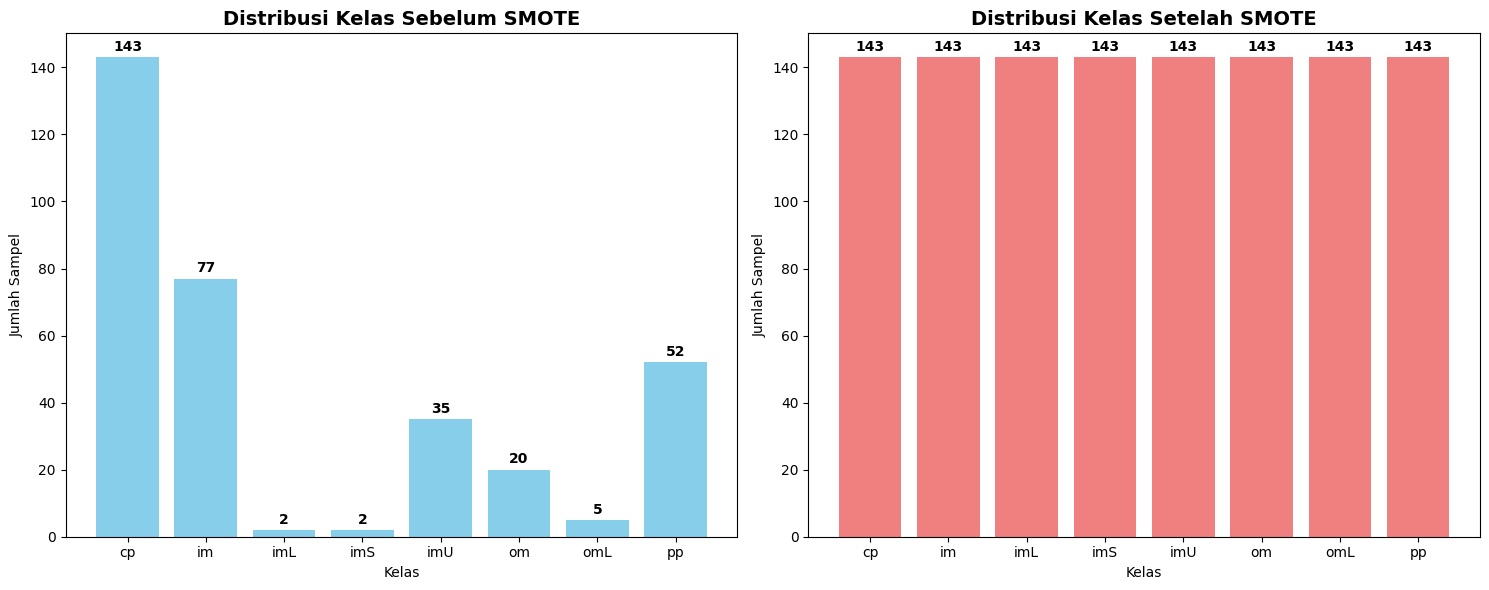


Tabel Perbandingan:
  Kelas  Sebelum SMOTE  Sesudah SMOTE  Sampel Sintetis Ditambahkan
0    cp            143            143                            0
1    im             77            143                           66
2   imL              2            143                          141
3   imS              2            143                          141
4   imU             35            143                          108
5    om             20            143                          123
6   omL              5            143                          138
7    pp             52            143                           91


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Distribusi sebelum dan sesudah SMOTE
before_counts = Counter(y)       # label sebelum resampling
after_counts = Counter(y_sm)     # label setelah SMOTE

species_names = sorted(before_counts.keys())
before_values = [before_counts[cls] for cls in species_names]
after_values = [after_counts[cls] for cls in species_names]

# Buat subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot distribusi kelas sebelum SMOTE
bars1 = axes[0].bar(species_names, before_values, color='skyblue')
axes[0].set_title('Distribusi Kelas Sebelum SMOTE', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Jumlah Sampel')
axes[0].set_xlabel('Kelas')

# Tambahkan label nilai
for bar, value in zip(bars1, before_values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 str(value), ha='center', va='bottom', fontweight='bold')

# Plot distribusi kelas setelah SMOTE
bars2 = axes[1].bar(species_names, after_values, color='lightcoral')
axes[1].set_title('Distribusi Kelas Setelah SMOTE', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Jumlah Sampel')
axes[1].set_xlabel('Kelas')

# Tambahkan label nilai
for bar, value in zip(bars2, after_values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabel perbandingan
print("\nTabel Perbandingan:")
comparison_df = pd.DataFrame({
    'Kelas': species_names,
    'Sebelum SMOTE': before_values,
    'Sesudah SMOTE': after_values,
    'Sampel Sintetis Ditambahkan': [after_values[i] - before_values[i] for i in range(len(species_names))]
})
print(comparison_df)


## Analisis PCA Data Setelah SMOTE

Visualisasi PCA Comparison:

Panel kiri: Scatter plot data asli dalam ruang PC1–PC2, masih menunjukkan ketidakseimbangan kelas.

Panel kanan: Scatter plot data setelah SMOTE dalam ruang PC1–PC2.

Distribusi awal kelas:
[('cp', 143), ('im', 77), ('imL', 2), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]

Distribusi setelah SMOTE:
[('cp', 143), ('im', 143), ('imL', 143), ('imS', 143), ('imU', 143), ('om', 143), ('omL', 143), ('pp', 143)]

VISUALISASI PCA DATA SETELAH SMOTE


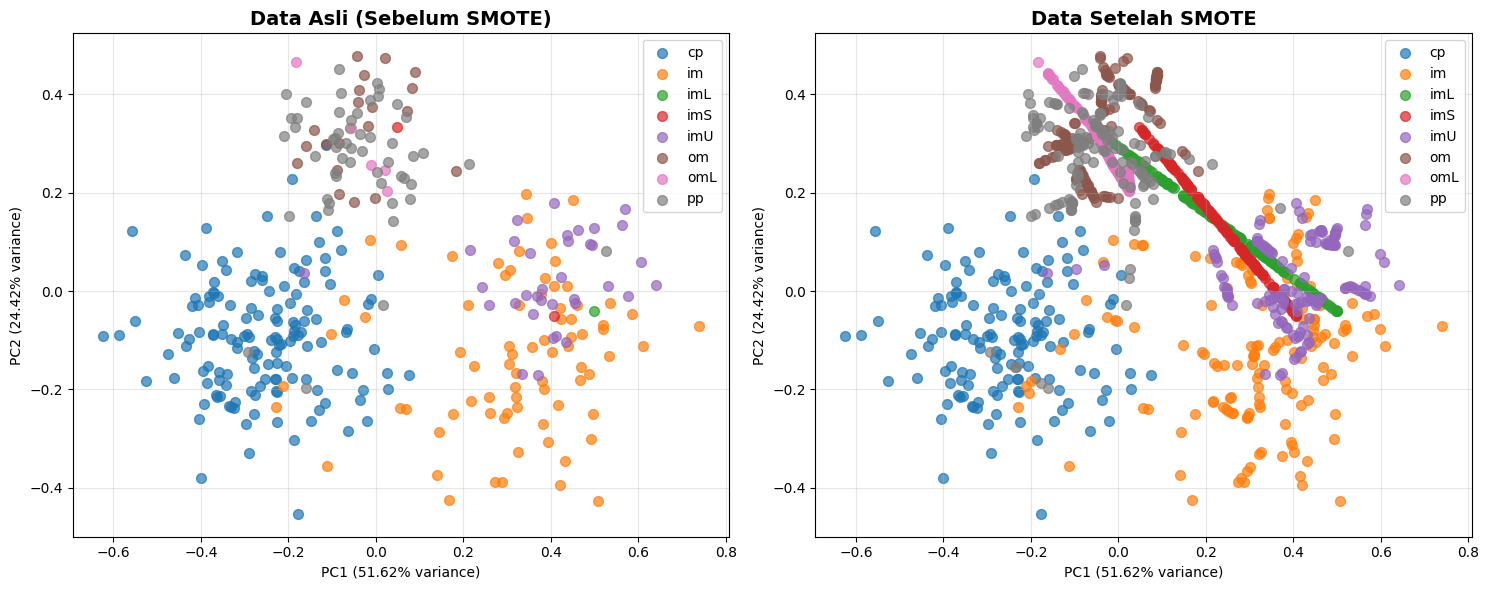


RINGKASAN HASIL SMOTE
• Data asli: 336 sampel
• Data setelah SMOTE: 1144 sampel
• Sampel sintetis ditambahkan: 808 sampel

Distribusi per kelas:
  - cp   | sebelum: 143 | sesudah: 143 | ditambah:   0
  - im   | sebelum:  77 | sesudah: 143 | ditambah:  66
  - imL  | sebelum:   2 | sesudah: 143 | ditambah: 141
  - imS  | sebelum:   2 | sesudah: 143 | ditambah: 141
  - imU  | sebelum:  35 | sesudah: 143 | ditambah: 108
  - om   | sebelum:  20 | sesudah: 143 | ditambah: 123
  - omL  | sebelum:   5 | sesudah: 143 | ditambah: 138
  - pp   | sebelum:  52 | sesudah: 143 | ditambah:  91


In [36]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# === Load dataset ===
df = pd.read_csv("ecoli.data", sep=r"\s+", names=[
    "sequence_name", "mcg", "gvh", "lip", "chg",
    "aac", "alm1", "alm2", "class"
])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["sequence_name", "class"])
y = df["class"]

print("Distribusi awal kelas:")
print(sorted(Counter(y).items()))

# ===================================
# Step 1: Terapkan SMOTE
# ===================================
smote = SMOTE(k_neighbors=1, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("\nDistribusi setelah SMOTE:")
print(sorted(Counter(y_res).items()))

# ===================================
# Step 2: Visualisasi PCA
# ===================================
print("\nVISUALISASI PCA DATA SETELAH SMOTE")

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# mapping hasil SMOTE
label_to_idx = {label: idx for idx, label in enumerate(le.classes_)}
y_res_encoded = [label_to_idx[label] for label in y_res]

pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_res = pca.transform(X_res)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
colors = plt.cm.tab10.colors
class_labels = le.classes_

# Plot data asli
for i, (color, label) in enumerate(zip(colors, class_labels)):
    mask = y_encoded == i
    axes[0].scatter(X_pca_original[mask, 0], X_pca_original[mask, 1],
                    c=[color], label=label, alpha=0.7, s=50)
axes[0].set_title('Data Asli (Sebelum SMOTE)', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot data hasil SMOTE
for i, (color, label) in enumerate(zip(colors, class_labels)):
    mask = [idx == i for idx in y_res_encoded]
    axes[1].scatter(X_pca_res[mask, 0], X_pca_res[mask, 1],
                    c=[color], label=label, alpha=0.7, s=50)
axes[1].set_title('Data Setelah SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================
# Step 3: Ringkasan distribusi
# ===================================
before_counts = Counter(y)
after_counts = Counter(y_res)

print("\nRINGKASAN HASIL SMOTE")
print(f"• Data asli: {len(y)} sampel")
print(f"• Data setelah SMOTE: {len(y_res)} sampel")
print(f"• Sampel sintetis ditambahkan: {len(y_res) - len(y)} sampel\n")

print("Distribusi per kelas:")
for label in class_labels:
    before = before_counts[label]
    after = after_counts[label]
    added = after - before
    print(f"  - {label:4} | sebelum: {before:3} | sesudah: {after:3} | ditambah: {added:3}")


## **Klasifikasi Data Sebelum dan Setelah di Seimbangkan Menggunakan Metode Naive Bayes**

Tujuan : Untuk mengetahui akurasi yang didapatkan dari metode ini,apakah tinggi atau sebaliknya.

## **Data tidak seimbang**

Pada tahap ini digunakan algoritma Naive Bayes (GaussianNB) untuk melakukan klasifikasi pada dataset asli tanpa proses penyeimbangan kelas.
Tahapan yang dilakukan meliputi:

1. Membagi dataset menjadi data latih dan data uji dengan perbandingan 80:20 menggunakan stratifikasi agar distribusi kelas tetap terjaga.

2. Melatih model Naive Bayes menggunakan data latih.

3. Mengukur performa model pada data uji dengan menghitung nilai akurasi serta menampilkan classification report dan confusion matrix.


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Baca dataset Ecoli
file_path = "ecoli.data"  # sesuaikan path dengan lokasi file kamu
column_names = [
    "sequence_name", "mcg", "gvh", "lip", "chg", "aac",
    "alm1", "alm2", "class"
]
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)

# 2. Pisahkan fitur dan label
X = df.drop(columns=["sequence_name", "class"])
y = df["class"]

# 3. Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Buat dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 5. Prediksi data uji
y_pred = model.predict(X_test)

# 6. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.7941176470588235

Classification Report:
              precision    recall  f1-score   support

          cp       0.97      1.00      0.98        29
          im       1.00      0.44      0.61        16
         imU       0.50      0.86      0.63         7
          om       0.00      0.00      0.00         4
         omL       1.00      1.00      1.00         1
          pp       0.61      1.00      0.76        11

    accuracy                           0.79        68
   macro avg       0.68      0.72      0.66        68
weighted avg       0.81      0.79      0.76        68


Confusion Matrix:
[[29  0  0  0  0  0]
 [ 1  7  6  0  0  2]
 [ 0  0  6  0  0  1]
 [ 0  0  0  0  0  4]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0 11]]


/tmp/ipython-input-562542896.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarnin

## **Data seimbang ( ADASYN )**

Pada tahap ini, menerapkan metode naive bayes kepada dataset yang sudah diseimbangkan.
Langkah-langkah yang dilakukan:

1. Terapkan ADASYN pada dataset untuk menghasilkan sampel sintetis pada kelas minoritas sehingga distribusi kelas menjadi lebih seimbang.

2. Pisahkan data hasil ADASYN menjadi data latih dan data uji dengan perbandingan 80:20 menggunakan stratifikasi.

3. Latih model Naive Bayes (GaussianNB).

4. Evaluasi model menggunakan data uji dengan menghitung akurasi, classification report, dan confusion matrix.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Baca dataset hasil ADASYN
file_path = "ecoli_ADASYN.csv"  # ganti sesuai nama file hasil ADASYN
df = pd.read_csv(file_path)

# 2. Pisahkan fitur dan label
X = df.drop(columns=["class"])
y = df["class"]

# 3. Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Buat dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 5. Prediksi data uji
y_pred = model.predict(X_test)

# 6. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 0.8448275862068966

Classification Report:
              precision    recall  f1-score   support

          cp       0.83      1.00      0.91        29
          im       0.94      0.52      0.67        31
         imL       1.00      1.00      1.00        28
         imS       0.97      1.00      0.98        28
         imU       0.70      0.79      0.74        29
          om       1.00      0.62      0.77        29
         omL       1.00      1.00      1.00        29
          pp       0.58      0.86      0.69        29

    accuracy                           0.84       232
   macro avg       0.88      0.85      0.84       232
weighted avg       0.88      0.84      0.84       232


Confusion Matrix:
[[29  0  0  0  0  0  0  0]
 [ 2 16  0  0 10  0  0  3]
 [ 0  0 28  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0]
 [ 0  1  0  1 23  0  0  4]
 [ 0  0  0  0  0 18  0 11]
 [ 0  0  0  0  0  0 29  0]
 [ 4  0  0  0  0  0  0 25]]


## **Data seimbang ( SMOTE )**

Pada tahap ini, kita melakukan klasifikasi menggunakan Naive Bayes (GaussianNB) pada dataset hasil penyeimbangan dengan SMOTE.
Langkah-langkah yang dilakukan adalah:

1. Membaca dataset hasil SMOTE yang sudah seimbang.

2. Memisahkan fitur (X) dan label (y).

3. Membagi data menjadi data latih dan data uji dengan perbandingan 80:20, 4. menggunakan stratified split agar distribusi kelas tetap seimbang di train-test.

4. Melatih model Naive Bayes menggunakan data latih.

5. Melakukan prediksi pada data uji.

6. Mengevaluasi hasil model dengan akurasi, classification report, dan confusion matrix.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Baca dataset hasil SMOTE
file_path = "data_smote.csv"  # ganti sesuai nama file hasil SMOTE
df = pd.read_csv(file_path)

# 2. Pisahkan fitur dan label
X = df.drop(columns=["class"])
y = df["class"]

# 3. Split data 80:20 (stratified agar seimbang di train-test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Buat dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 5. Prediksi data uji
y_pred = model.predict(X_test)

# 6. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 0.8427947598253275

Classification Report:
              precision    recall  f1-score   support

          cp       0.80      1.00      0.89        28
          im       1.00      0.50      0.67        28
         imL       1.00      1.00      1.00        29
         imS       1.00      1.00      1.00        29
         imU       0.81      0.86      0.83        29
          om       1.00      0.43      0.60        28
         omL       1.00      1.00      1.00        29
          pp       0.54      0.93      0.68        29

    accuracy                           0.84       229
   macro avg       0.89      0.84      0.83       229
weighted avg       0.89      0.84      0.84       229


Confusion Matrix:
[[28  0  0  0  0  0  0  0]
 [ 5 14  0  0  6  0  0  3]
 [ 0  0 29  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0]
 [ 0  0  0  0 25  0  0  4]
 [ 0  0  0  0  0 12  0 16]
 [ 0  0  0  0  0  0 29  0]
 [ 2  0  0  0  0  0  0 27]]


## **Klasifikasi Data Sebelum dan Setelah di Seimbangkan Menggunakan Metode Random Forest**

Tujuan : Untuk mengetahui akurasi yang didapatkan dari metode ini,apakah tinggi atau sebaliknya.

## **Data tidak seimbang**

Pada tahap ini digunakan algoritma Random Forest untuk melakukan klasifikasi pada dataset asli tanpa melakukan penyeimbangan kelas. Tahapan yang dilakukan meliputi:

1. Membagi dataset menjadi data latih dan data uji dengan perbandingan 80:20 menggunakan stratifikasi agar distribusi kelas tetap terjaga.

2. Melatih model Random Forest menggunakan data latih.

3. Mengevaluasi performa model pada data uji dengan menghitung akurasi, serta menampilkan classification report dan confusion matrix.


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Baca dataset Ecoli
file_path = "ecoli.data"  # sesuaikan path dengan lokasi file kamu
column_names = [
    "sequence_name", "mcg", "gvh", "lip", "chg", "aac",
    "alm1", "alm2", "class"
]
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)

# 2. Pisahkan fitur dan label
X = df.drop(columns=["sequence_name", "class"])
y = df["class"]

# 3. Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Buat dan latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Prediksi data uji
y_pred = model.predict(X_test)

# 6. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/tmp/ipython-input-3911053077.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)


Akurasi: 0.8676470588235294

Classification Report:
              precision    recall  f1-score   support

          cp       0.94      1.00      0.97        29
          im       0.91      0.62      0.74        16
         imU       0.50      0.86      0.63         7
          om       1.00      1.00      1.00         4
         omL       1.00      1.00      1.00         1
          pp       1.00      0.82      0.90        11

    accuracy                           0.87        68
   macro avg       0.89      0.88      0.87        68
weighted avg       0.90      0.87      0.87        68


Confusion Matrix:
[[29  0  0  0  0  0]
 [ 0 10  6  0  0  0]
 [ 0  1  6  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  1  0]
 [ 2  0  0  0  0  9]]


## **Data seimbang ( ADASYN )**

Pada tahap ini, diterapkan metode Random Forest pada dataset yang sudah diseimbangkan. Langkah-langkah yang dilakukan meliputi:

1. Terapkan ADASYN pada dataset untuk menghasilkan sampel sintetis pada kelas minoritas sehingga distribusi kelas menjadi lebih seimbang.

2. Pisahkan data hasil ADASYN menjadi data latih dan data uji dengan perbandingan 80:20 menggunakan stratifikasi.

3. Latih model Random Forest menggunakan data latih.

4. Evaluasi performa model pada data uji dengan menghitung akurasi, serta menampilkan classification report dan confusion matrix.

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Baca dataset hasil ADASYN
file_path = "ecoli_ADASYN.csv"  # ganti sesuai nama file hasil ADASYN
df = pd.read_csv(file_path)

# 2. Pisahkan fitur dan label
X = df.drop(columns=["class"])
y = df["class"]

# 3. Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Buat dan latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Prediksi data uji
y_pred = model.predict(X_test)

# 6. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 0.9482758620689655

Classification Report:
              precision    recall  f1-score   support

          cp       0.91      1.00      0.95        29
          im       0.93      0.81      0.86        31
         imL       1.00      1.00      1.00        28
         imS       1.00      1.00      1.00        28
         imU       0.82      0.93      0.87        29
          om       1.00      0.97      0.98        29
         omL       1.00      1.00      1.00        29
          pp       0.96      0.90      0.93        29

    accuracy                           0.95       232
   macro avg       0.95      0.95      0.95       232
weighted avg       0.95      0.95      0.95       232


Confusion Matrix:
[[29  0  0  0  0  0  0  0]
 [ 0 25  0  0  6  0  0  0]
 [ 0  0 28  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0]
 [ 0  2  0  0 27  0  0  0]
 [ 0  0  0  0  0 28  0  1]
 [ 0  0  0  0  0  0 29  0]
 [ 3  0  0  0  0  0  0 26]]


## **Data seimbang ( SMOTE )**

Pada tahap ini, dilakukan klasifikasi menggunakan Random Forest pada dataset hasil penyeimbangan dengan SMOTE. Langkah-langkah yang dilakukan adalah:

1. Membaca dataset hasil SMOTE yang sudah seimbang.

2. Memisahkan fitur (X) dan label (y).

3. Membagi data menjadi data latih dan data uji dengan perbandingan 80:20, menggunakan stratified split agar distribusi kelas tetap seimbang di train-test.

4. Melatih model Random Forest menggunakan data latih.

5. Melakukan prediksi pada data uji.

6. Mengevaluasi performa model menggunakan akurasi, classification report, dan confusion matrix.

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Baca dataset hasil SMOTE
file_path = "data_smote.csv"  # ganti sesuai nama file hasil SMOTE
df = pd.read_csv(file_path)

# 2. Pisahkan fitur dan label
X = df.drop(columns=["class"])
y = df["class"]

# 3. Split data 80:20 (stratified agar seimbang di train-test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Buat dan latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Prediksi data uji
y_pred = model.predict(X_test)

# 6. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 0.9519650655021834

Classification Report:
              precision    recall  f1-score   support

          cp       0.88      1.00      0.93        28
          im       0.89      0.86      0.87        28
         imL       1.00      1.00      1.00        29
         imS       1.00      1.00      1.00        29
         imU       0.89      0.86      0.88        29
          om       1.00      0.96      0.98        28
         omL       1.00      1.00      1.00        29
          pp       0.96      0.93      0.95        29

    accuracy                           0.95       229
   macro avg       0.95      0.95      0.95       229
weighted avg       0.95      0.95      0.95       229


Confusion Matrix:
[[28  0  0  0  0  0  0  0]
 [ 1 24  0  0  3  0  0  0]
 [ 0  0 29  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0]
 [ 1  3  0  0 25  0  0  0]
 [ 0  0  0  0  0 27  0  1]
 [ 0  0  0  0  0  0 29  0]
 [ 2  0  0  0  0  0  0 27]]


## **Klasifikasi Data Sebelum dan Sesudah Diseimbangkan Menggunakan Bagging Classifier dengan Random Forest / Naive Bayes**

**Bagging Classifier** digunakan untuk mengurangi overfitting dan variasi prediksi, terutama pada model yang cenderung sensitif terhadap perubahan data, seperti Decision Tree atau Random Forest.

Dalam konteks ini,dataset diuji dalam tiga kondisi:

1. Dataset asli (tidak seimbang)

2. Dataset seimbang menggunakan ADASYN

3. Dataset seimbang menggunakan SMOTE

Dua base estimator diuji:

1. Naive Bayes – sederhana, cepat, cocok untuk data dengan fitur independen.

2. Random Forest – ensemble dari decision tree, kuat untuk menangani dataset yang kompleks.

Dengan Bagging Classifier, diharapkan akurasi dan stabilitas model meningkat, terutama pada dataset yang sebelumnya tidak seimbang, karena teknik ini mengurangi risiko prediksi bias terhadap kelas mayoritas.

## **Bagging dengan Data tidak seimbang**

In [69]:
import warnings
warnings.filterwarnings("ignore")  # Menghilangkan semua warning sementara

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ===== 1. Load dataset asli =====
file_path = "ecoli.data"
column_names = [
    "sequence_name", "mcg", "gvh", "lip", "chg", "aac",
    "alm1", "alm2", "class"
]
df = pd.read_csv(file_path, sep='\s+', header=None, names=column_names)  # gunakan sep='\s+'

# ===== 2. Pisahkan fitur dan label =====
X = df.drop(columns=["sequence_name", "class"])
y = df["class"]

# ===== 3. Split data 80:20 stratified =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== 4a. Bagging Naive Bayes =====
bagging_nb = BaggingClassifier(
    estimator=GaussianNB(),
    n_estimators=50,
    random_state=42
)
bagging_nb.fit(X_train, y_train)
y_pred_nb = bagging_nb.predict(X_test)

# ===== 4b. Bagging Random Forest =====
bagging_rf = BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_estimators=20,
    random_state=42
)
bagging_rf.fit(X_train, y_train)
y_pred_rf = bagging_rf.predict(X_test)

# ===== 5. Evaluasi =====
results = pd.DataFrame({
    "Model": ["Bagging Naive Bayes", "Bagging Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_nb, average='weighted'),
        precision_score(y_test, y_pred_rf, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, y_pred_nb, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_nb, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted')
    ]
})

print("=== Perbandingan Model Bagging (Dataset Asli) ===")
print(results)


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1404721902.py:16: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', header=None, names=column_names)  # gunakan sep='\s+'


=== Perbandingan Model Bagging (Dataset Asli) ===
                   Model  Accuracy  Precision    Recall  F1-Score
0    Bagging Naive Bayes  0.911765   0.926584  0.911765  0.909983
1  Bagging Random Forest  0.882353   0.912923  0.882353  0.886141


## **Bagging dengan Data seimbang ADASYN**

In [70]:
import warnings
warnings.filterwarnings("ignore")  # Menghilangkan semua warning sementara

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ===== 1. Load dataset hasil ADASYN =====
file_path = "ecoli_ADASYN.csv"  # ganti sesuai path dataset ADASYN
df = pd.read_csv(file_path)

# ===== 2. Pisahkan fitur dan label =====
X = df.drop(columns=["class"])
y = df["class"]

# ===== 3. Split data 80:20 stratified =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== 4a. Bagging Naive Bayes =====
bagging_nb = BaggingClassifier(
    estimator=GaussianNB(),
    n_estimators=50,
    random_state=42
)
bagging_nb.fit(X_train, y_train)
y_pred_nb = bagging_nb.predict(X_test)

# ===== 4b. Bagging Random Forest =====
bagging_rf = BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_estimators=20,
    random_state=42
)
bagging_rf.fit(X_train, y_train)
y_pred_rf = bagging_rf.predict(X_test)

# ===== 5. Evaluasi =====
results = pd.DataFrame({
    "Model": ["Bagging Naive Bayes", "Bagging Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_nb, average='weighted'),
        precision_score(y_test, y_pred_rf, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, y_pred_nb, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_nb, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted')
    ]
})

print("=== Perbandingan Model Bagging (Dataset ADASYN) ===")
print(results)


=== Perbandingan Model Bagging (Dataset ADASYN) ===
                   Model  Accuracy  Precision    Recall  F1-Score
0    Bagging Naive Bayes  0.853448   0.879890  0.853448  0.850692
1  Bagging Random Forest  0.939655   0.944027  0.939655  0.939424


## **Bagging dengan Data seimbang SMOTE**

In [71]:
import warnings
warnings.filterwarnings("ignore")  # Menghilangkan semua warning sementara

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ===== 1. Load dataset hasil SMOTE =====
file_path = "data_smote.csv"  # ganti sesuai path dataset SMOTE
df = pd.read_csv(file_path)

# ===== 2. Pisahkan fitur dan label =====
X = df.drop(columns=["class"])
y = df["class"]

# ===== 3. Split data 80:20 stratified =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== 4a. Bagging Naive Bayes =====
bagging_nb = BaggingClassifier(
    estimator=GaussianNB(),
    n_estimators=50,
    random_state=42
)
bagging_nb.fit(X_train, y_train)
y_pred_nb = bagging_nb.predict(X_test)

# ===== 4b. Bagging Random Forest =====
bagging_rf = BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_estimators=20,
    random_state=42
)
bagging_rf.fit(X_train, y_train)
y_pred_rf = bagging_rf.predict(X_test)

# ===== 5. Evaluasi =====
results = pd.DataFrame({
    "Model": ["Bagging Naive Bayes", "Bagging Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_nb, average='weighted'),
        precision_score(y_test, y_pred_rf, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, y_pred_nb, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_nb, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted')
    ]
})

print("=== Perbandingan Model Bagging (Dataset SMOTE) ===")
print(results)


=== Perbandingan Model Bagging (Dataset SMOTE) ===
                   Model  Accuracy  Precision    Recall  F1-Score
0    Bagging Naive Bayes  0.838428   0.878504  0.838428  0.833081
1  Bagging Random Forest  0.960699   0.963319  0.960699  0.960754


In [77]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate  # <- untuk menampilkan tabel dengan garis

# ===== Fungsi preprocessing =====
def preprocess_df(df, drop_cols=None):
    if drop_cols:
        df = df.drop(columns=drop_cols)
    X = df.drop(columns=["class"])
    y = df["class"]

    # Encode fitur kategorikal
    for col in X.columns:
        if X[col].dtype == object:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])

    # Encode target jika string
    if y.dtype == object:
        le_y = LabelEncoder()
        y = le_y.fit_transform(y)

    return X, y

# ===== Evaluasi model biasa =====
def evaluate_model(df, dataset_name, model, drop_cols=None):
    X, y = preprocess_df(df, drop_cols)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_name_map = {
        "GaussianNB": "Naive Bayes",
        "RandomForestClassifier": "Random Forest"
    }
    model_name = type(model).__name__
    model_label = model_name_map.get(model_name, model_name)

    return {
        "Dataset": dataset_name,
        "Model": model_label,
        "Accuracy": accuracy_score(y_test, y_pred)
    }

# ===== Evaluasi Bagging =====
def evaluate_bagging(df, dataset_name, base_model, drop_cols=None, n_estimators_bag=20):
    X, y = preprocess_df(df, drop_cols)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    bagging = BaggingClassifier(estimator=base_model, n_estimators=n_estimators_bag, random_state=42)
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)

    model_name_map = {
        "GaussianNB": "Bagging Naive Bayes",
        "RandomForestClassifier": "Bagging Random Forest"
    }
    base_name = type(base_model).__name__
    model_label = model_name_map.get(base_name, f"Bagging {base_name}")

    return {
        "Dataset": dataset_name,
        "Model": model_label,
        "Accuracy": accuracy_score(y_test, y_pred)
    }

# ===== Load dataset =====
file_asli = "ecoli.data"
column_names = ["sequence_name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "class"]
df_asli = pd.read_csv(file_asli, sep='\s+', header=None, names=column_names)
df_adasyn = pd.read_csv("ecoli_ADASYN.csv")
df_smote = pd.read_csv("data_smote.csv")

datasets = [
    ("Asli", df_asli, ["sequence_name"]),
    ("ADASYN", df_adasyn, None),
    ("SMOTE", df_smote, None)
]

# ===== Jalankan evaluasi =====
results = []
for name, df, drop_cols in datasets:
    results.append(evaluate_model(df, name, GaussianNB(), drop_cols))
    results.append(evaluate_model(df, name, RandomForestClassifier(n_estimators=100, random_state=42), drop_cols))
    results.append(evaluate_bagging(df, name, GaussianNB(), drop_cols, n_estimators_bag=50))
    results.append(evaluate_bagging(df, name, RandomForestClassifier(n_estimators=100, random_state=42), drop_cols, n_estimators_bag=20))

# ===== Buat dataframe hasil =====
results_df = pd.DataFrame(results)

# ===== Buat pivot table untuk akurasi =====
accuracy_pivot = results_df.pivot(index="Dataset", columns="Model", values="Accuracy")

# Urutkan kolom agar lebih rapi
accuracy_pivot = accuracy_pivot[["Naive Bayes", "Random Forest", "Bagging Naive Bayes", "Bagging Random Forest"]]

# Format 2 desimal
accuracy_pivot = accuracy_pivot.round(2)

# Tampilkan tabel dengan garis
print("=== Tabel Perbandingan Akurasi Semua Model ===")
print(tabulate(accuracy_pivot, headers="keys", tablefmt="grid"))


=== Tabel Perbandingan Akurasi Semua Model ===
+-----------+---------------+-----------------+-----------------------+-------------------------+
| Dataset   |   Naive Bayes |   Random Forest |   Bagging Naive Bayes |   Bagging Random Forest |
+===========+===============+=================+=======================+=========================+
| ADASYN    |          0.84 |            0.95 |                  0.85 |                    0.94 |
+-----------+---------------+-----------------+-----------------------+-------------------------+
| Asli      |          0.79 |            0.87 |                  0.91 |                    0.88 |
+-----------+---------------+-----------------+-----------------------+-------------------------+
| SMOTE     |          0.84 |            0.95 |                  0.84 |                    0.96 |
+-----------+---------------+-----------------+-----------------------+-------------------------+
